In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from spread import variance, standard_deviation, zipped_z_scores

# International Energy Agency Data
* Contains total global CO2 emissions
* Contains CO2 emissions breakdown by fossil fuel

In [11]:
data_to_load = "TPES by source.csv"
TPES = pd.read_csv(data_to_load)
TPES["Fossil fuels"] = TPES["Coal"] + TPES["Natural gas"] + TPES["Primary and secondary oil"]
TPES = TPES.rename(columns={"Primary and secondary oil":"Oil"})
TPES

Year     Coal  Natural gas  Nuclear   Hydro  Geothermal, solar, etc.  \
0  1990  2219520      1663132   525614  184254                    36804   
1  1995  2208206      1807249   608208  213181                    42674   
2  2000  2310845      2071209   675588  225236                    60227   
3  2005  2993197      2359855   721835  252372                    70297   
4  2010  3654428      2736149   718959  296057                   110564   
5  2015  3836087      2943721   670730  334396                   200564   

   Biofuels and waste      Oil  Fossil fuels  
0              909395  3235001       7117653  
1              972130  3375792       7391247  
2             1022686  3660187       8042241  
3             1095954  4004981       9358033  
4             1213418  4141910      10532487  
5             1323472  4334282      11114090

# Total Global Energy Emission over time

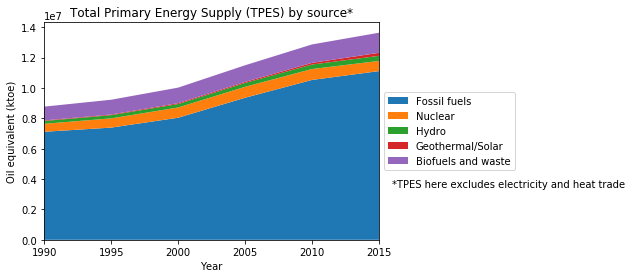

In [43]:
x = TPES["Year"]
y1 = TPES["Fossil fuels"]
y2 = TPES["Nuclear"]
y3 = TPES["Hydro"]
y4 = TPES["Geothermal, solar, etc."]
y5 = TPES["Biofuels and waste"]

y = np.vstack([y1, y2, y3, y4, y5])

labels = ["Fossil fuels", "Nuclear", "Hydro", "Geothermal/Solar", "Biofuels and waste"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, y5, labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total Primary Energy Supply (TPES) by source*")
plt.text(2016, 3500000.4, "*TPES here excludes electricity and heat trade") 
plt.xlim(1990, 2015)
plt.xlabel("Year")
plt.ylabel("Oil equivalent (ktoe)")
plt.savefig("Output/Total Primary Energy Supply (TPES) by source.png")
plt.show()

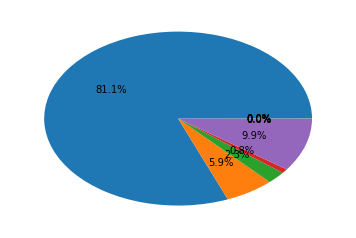

In [49]:
sizes = [sum(y1), sum(y2), sum(y3), sum(y4), sum(y5), sum(y6), sum(y7), sum(y8), sum(y9)]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()

In [13]:
data_file = "Work_file.xlsx"

#Total
CO2_Fuel = pd.read_excel(data_file,header=3,sheet_name="CO2 FC")
#Coal
CO2_Fuel_Coal = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Coal")
#Oil
CO2_Fuel_Oil = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Oil")
#Gas
CO2_Fuel_Gas = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Gas")
#GDP
CO2_GDP = pd.read_excel(data_file,header=3,sheet_name="GDP")
#Population
CO2_Population = pd.read_excel(data_file,header=3,sheet_name="POP")
#Per capita
CO2_Per_capita = pd.read_excel(data_file,header=3,sheet_name="CO2 - POP")
#Per GDP
CO2_Per_GDP = pd.read_excel(data_file,header=3,sheet_name="CO2 - GDP")

#Total Fossil Fuel CO2 emissions
CO2_Fuel_df = pd.DataFrame(CO2_Fuel.loc[1,:])
CO2_Fuel_df = CO2_Fuel_df.reset_index()
CO2_Fuel_df.columns = ["Year","Total Global CO2 emissions"]
CO2_Fuel_df = CO2_Fuel_df.drop([0])

#CO2 emissions from Coal
CO2_Fuel_Coal_df = pd.DataFrame(CO2_Fuel_Coal.loc[1,:])
CO2_Fuel_Coal_df = CO2_Fuel_Coal_df.reset_index()
CO2_Fuel_Coal_df.columns = ["Year","Global CO2 emissions from Coal"]
CO2_Fuel_Coal_df = CO2_Fuel_Coal_df.drop([0])

#CO2 emissions from Oil
CO2_Fuel_Oil_df = pd.DataFrame(CO2_Fuel_Oil.loc[1,:])
CO2_Fuel_Oil_df = CO2_Fuel_Oil_df.reset_index()
CO2_Fuel_Oil_df.columns = ["Year","Global CO2 emissions from Oil"]
CO2_Fuel_Oil_df = CO2_Fuel_Oil_df.drop([0])

#CO2 emissions from Gas
CO2_Fuel_Gas_df = pd.DataFrame(CO2_Fuel_Gas.loc[1,:])
CO2_Fuel_Gas_df = CO2_Fuel_Gas_df.reset_index()
CO2_Fuel_Gas_df.columns = ["Year","Global CO2 emissions from Gas"]
CO2_Fuel_Gas_df = CO2_Fuel_Gas_df.drop([0])
#CO2_Fuel_Gas_df

#Merge
CO2_Fuel_Final_df = CO2_Fuel_df.merge(CO2_Fuel_Coal_df,on="Year")
CO2_Fuel_Final_df = CO2_Fuel_Final_df.merge(CO2_Fuel_Oil_df,on="Year")
CO2_Fuel_Final_df = CO2_Fuel_Final_df.merge(CO2_Fuel_Gas_df,on="Year")
CO2_Fuel_Final_df["Year"] = pd.to_numeric(CO2_Fuel_Final_df["Year"])
CO2_Fuel_Final_df["Total Global CO2 emissions"] = pd.to_numeric(CO2_Fuel_Final_df["Total Global CO2 emissions"])
CO2_Fuel_Final_df["Global CO2 emissions from Coal"] = pd.to_numeric(CO2_Fuel_Final_df["Global CO2 emissions from Coal"])
CO2_Fuel_Final_df["Global CO2 emissions from Oil"] = pd.to_numeric(CO2_Fuel_Final_df["Global CO2 emissions from Oil"])
CO2_Fuel_Final_df["Global CO2 emissions from Gas"] = pd.to_numeric(CO2_Fuel_Final_df["Global CO2 emissions from Gas"])

CO2_Fuel_Final_df.head()

Year  Total Global CO2 emissions  Global CO2 emissions from Coal  \
0  1971                 13942.23672                     3200.080360   
1  1972                 14616.86301                     3196.399529   
2  1973                 15457.51475                     3317.969282   
3  1974                 15423.83391                     3293.708222   
4  1975                 15484.10848                     3206.690267   

   Global CO2 emissions from Oil  Global CO2 emissions from Gas  
0                    4655.898940                    1484.882269  
1                    4996.782423                    1564.223070  
2                    5357.520580                    1611.061404  
3                    5153.408856                    1625.590319  
4                    4989.392293                    1554.476366

# Breakdown of CO2 Emissions from Fossil Fuels over time

2015


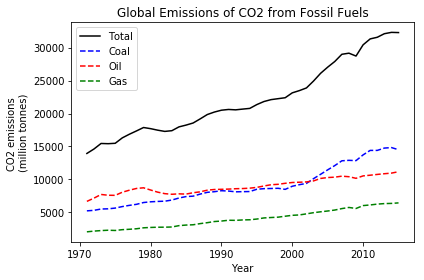

In [47]:
data_file = "CO2Highlights.XLSX"

#Total
CO2_Fuel_L = pd.read_excel(data_file,header=3,sheet_name="CO2 FC")
#Coal
CO2_Fuel_Coal_L = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Coal") 
#Oil
CO2_Fuel_Oil_L = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Oil")
#Gas
CO2_Fuel_Gas_L = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Gas")

#Total Fossil Fuel CO2 emissions
CO2_Fuel_df_L = pd.DataFrame(CO2_Fuel_L.loc[1,:])
CO2_Fuel_df_L = CO2_Fuel_df_L.reset_index()
CO2_Fuel_df_L.columns = ["Year","Total Global CO2 emissions(million tonnes)"]
CO2_Fuel_df_L = CO2_Fuel_df_L.drop([0])

#CO2 emissions from Coal
CO2_Fuel_Coal_df_L = pd.DataFrame(CO2_Fuel_Coal_L.loc[1,:])
CO2_Fuel_Coal_df_L = CO2_Fuel_Coal_df_L.reset_index()
CO2_Fuel_Coal_df_L.columns = ["Year","Global CO2 emissions from Coal(million tonnes)"]
CO2_Fuel_Coal_df_L = CO2_Fuel_Coal_df_L.drop([0])

#CO2 emissions from Oil
CO2_Fuel_Oil_df_L = pd.DataFrame(CO2_Fuel_Oil_L.loc[1,:])
CO2_Fuel_Oil_df_L = CO2_Fuel_Oil_df_L.reset_index()
CO2_Fuel_Oil_df_L.columns = ["Year","Global CO2 emissions from Oil(million tonnes)"]
CO2_Fuel_Oil_df_L = CO2_Fuel_Oil_df_L.drop([0])

#CO2 emissions from Gas
CO2_Fuel_Gas_df_L = pd.DataFrame(CO2_Fuel_Gas_L.loc[1,:])
CO2_Fuel_Gas_df_L = CO2_Fuel_Gas_df_L.reset_index()
CO2_Fuel_Gas_df_L.columns = ["Year","Global CO2 emissions from Gas(million tonnes)"]
CO2_Fuel_Gas_df_L = CO2_Fuel_Gas_df_L.drop([0])
CO2_Fuel_Gas_df_L

#Merge
CO2_Fuel_Final_df_L = CO2_Fuel_df_L.merge(CO2_Fuel_Coal_df_L,on="Year")
CO2_Fuel_Final_df_L = CO2_Fuel_Final_df_L.merge(CO2_Fuel_Oil_df_L,on="Year")
CO2_Fuel_Final_df_L = CO2_Fuel_Final_df_L.merge(CO2_Fuel_Gas_df_L,on="Year")

#Total
x_axis_L = CO2_Fuel_Final_df_L["Year"].tolist()
y_axis_Total_L = CO2_Fuel_Final_df_L["Total Global CO2 emissions(million tonnes)"].tolist()
plt.plot(x_axis_L,y_axis_Total_L,color='k',label="Total")
#Coal
y_axis_Coal_L = CO2_Fuel_Final_df_L["Global CO2 emissions from Coal(million tonnes)"].tolist()
plt.plot(x_axis_L,y_axis_Coal_L,color='b',label="Coal",linestyle="--")
#Oil
y_axis_Oil_L = CO2_Fuel_Final_df_L["Global CO2 emissions from Oil(million tonnes)"].tolist()
plt.plot(x_axis_L,y_axis_Oil_L,color='r',label="Oil",linestyle="--")
#Gas
y_axis_Gas_L = CO2_Fuel_Final_df_L["Global CO2 emissions from Gas(million tonnes)"].tolist()
plt.plot(x_axis_L,y_axis_Gas_L,color='g',label="Gas",linestyle="--")

print(x_axis_L[-1])
#plt.fill_between(32294.21268)

#Labels
plt.title("Global Emissions of CO2 from Fossil Fuels")
plt.xlabel("Year")
plt.ylabel("CO2 emissions \n(million tonnes)")
plt.legend()
plt.tight_layout()
plt.savefig("Output/Global Emissions of CO2 from Fossil Fuels.png")
plt.show()

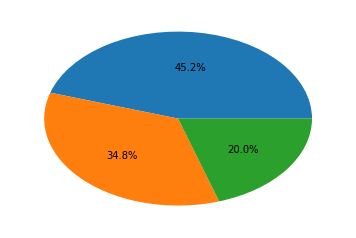

In [50]:
#Coal
y_axis_Coal_per = CO2_Fuel_Final_df_L["Global CO2 emissions from Coal(million tonnes)"].tolist()[-1]

#Oil
y_axis_Oil_per = CO2_Fuel_Final_df_L["Global CO2 emissions from Oil(million tonnes)"].tolist()[-1]

#Gas
y_axis_Gas_per = CO2_Fuel_Final_df_L["Global CO2 emissions from Gas(million tonnes)"].tolist()[-1]

sizes = [y_axis_Coal_per,y_axis_Oil_per,y_axis_Gas_per]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()

# Regional breakdown of CO2 Emissions from Coal over time

In [21]:
#Regional CO2 emissions from Coal
CO2_Regional_Fuel_Coal_df = pd.DataFrame(CO2_Fuel_Coal)
CO2_Regional_Fuel_Coal_df = CO2_Regional_Fuel_Coal_df.set_index("million tonnes of CO2")
CO2_Regional_Fuel_Coal_df = CO2_Regional_Fuel_Coal_df.T
CO2_Regional_Fuel_Coal_df = CO2_Regional_Fuel_Coal_df.reset_index(level=0)
CO2_Regional_Fuel_Coal_df = CO2_Regional_Fuel_Coal_df.rename(columns={"index":"Year"})
CO2_Regional_Fuel_Coal_df[["Year", "World", "OECD Total", "Non-OECD Total"]] = CO2_Regional_Fuel_Coal_df[["Year", "World", "OECD Total", "Non-OECD Total"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Coal_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]] = CO2_Regional_Fuel_Coal_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Coal_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]] = CO2_Regional_Fuel_Coal_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Coal_df["Non-OECD Europe and Eurasia"] = CO2_Regional_Fuel_Coal_df["Non-OECD Europe and Eurasia"].apply(pd.to_numeric)
CO2_Regional_Fuel_Coal_df["Africa"] = CO2_Regional_Fuel_Coal_df["Africa"].apply(pd.to_numeric)
CO2_Regional_Fuel_Coal_df["Asia (excl. China)"] = CO2_Regional_Fuel_Coal_df["Asia (excl. China)"].apply(pd.to_numeric)
#CO2_Regional_Fuel_Coal_df = CO2_Regional_Fuel_Coal_df.loc[:, CO2_Regional_Fuel_Coal_df.columns.notnull()]
#print(list(CO2_Regional_Fuel_Coal_df))
CO2_Regional_Fuel_Coal_df.head()


million tonnes of CO2  Year        World   OECD Total  Non-OECD Total  \
0                      1971  5229.314927  3200.080360     2029.136341   
1                      1972  5306.076146  3196.399529     2109.607859   
2                      1973  5506.308193  3317.969282     2188.338911   
3                      1974  5535.908239  3293.708222     2242.200017   
4                      1975  5647.955143  3206.690267     2441.264876   

million tonnes of CO2   Canada    Chile   Mexico United States  OECD Americas  \
0                      63.8825  5.14142  5.17631       1105.68    1179.884135   
1                       59.318  4.38085  5.79221       1171.08    1240.568103   
2                      59.9927  4.62841  6.48655       1241.67    1312.776085   
3                      58.7341  4.53729  6.78781       1234.27    1304.325514   
4                      59.0288  3.59662  6.66438       1226.07    1295.364455   

million tonnes of CO2 Australia     ...     Jordan Kuwait   Lebanon Oman  \
0                       75.2557     ...          0      0  0.011547    0   
1                       79.3217     ...          0      0  0.020602    0   
2                       81.5687     ...          0      0  0.047776    0   
3                       86.9435     ...          0      0  0.032678    0   
4                       92.8662     ...          0      0  0.032678    0   

million tonnes of CO2  Qatar Saudi Arabia Syrian Arab Republic   \
0                          0            0              0.019048   
1                          0            0              0.005346   
2                          0            0              0.011215   
3                          0            0              0.005346   
4                          0            0              0.008194   

million tonnes of CO2 United Arab Emirates Yemen Middle East  
0                                        0     0    0.455835  
1                                        0     0    0.691291  
2                                        0     0    1.169118  
3                                        0     0    1.248428  
4                                        0     0    2.171024  

[5 rows x 161 columns]

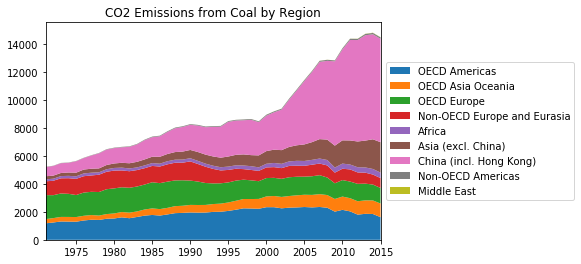

In [72]:
#x = CO2_Regional_Fuel_Coal_df["Year"]
x = x_axis_L
y1 = CO2_Regional_Fuel_Coal_df["OECD Americas"]
y2 = CO2_Regional_Fuel_Coal_df["OECD Asia Oceania"]
y3 = CO2_Regional_Fuel_Coal_df["OECD Europe"]
y4 = CO2_Regional_Fuel_Coal_df["Non-OECD Europe and Eurasia"]
y5 = CO2_Regional_Fuel_Coal_df["Africa"]
y6 = CO2_Regional_Fuel_Coal_df["Asia (excl. China)"]
y7 = CO2_Regional_Fuel_Coal_df["China (incl. Hong Kong, China)"]
y8 = CO2_Regional_Fuel_Coal_df["Non-OECD Americas"]
y9 = CO2_Regional_Fuel_Coal_df["Middle East"]
                
y = np.vstack((y1, y2, y3, y4, y5, y6, y7, y8, y9))

labels = ["OECD Americas", "OECD Asia Oceania", "OECD Europe", "Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)", "China (incl. Hong Kong)", "Non-OECD Americas", "Middle East"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels)
plt.title("CO2 Emissions from Coal by Region")
plt.xlim(1971, 2015)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Output/CO2 Emissions from Coal by Region.png")
plt.show()

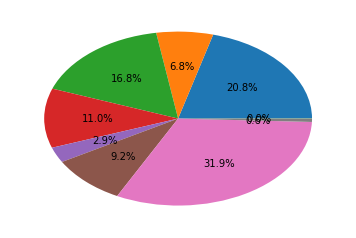

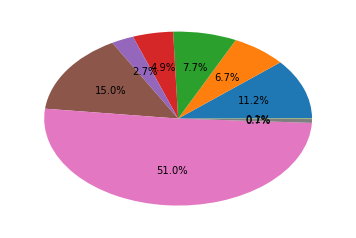

In [73]:
sizes = [sum(y1), sum(y2), sum(y3), sum(y4), sum(y5), sum(y6), sum(y7), sum(y8), sum(y9)]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()
sizes = [y1.tolist()[-1],y2.tolist()[-1],y3.tolist()[-1],y4.tolist()[-1],y5.tolist()[-1],y6.tolist()[-1],y7.tolist()[-1],y8.tolist()[-1],y9.tolist()[-1]]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()

# Regional breakdown of CO2 Emissions from Oil over time

In [23]:
#Regional CO2 emissions from Oil
CO2_Regional_Fuel_Oil_df = pd.DataFrame(CO2_Fuel_Oil)
CO2_Regional_Fuel_Oil_df = CO2_Regional_Fuel_Oil_df.set_index("million tonnes of CO2")
CO2_Regional_Fuel_Oil_df = CO2_Regional_Fuel_Oil_df.T
CO2_Regional_Fuel_Oil_df = CO2_Regional_Fuel_Oil_df.reset_index(level=0)
CO2_Regional_Fuel_Oil_df = CO2_Regional_Fuel_Oil_df.rename(columns={"index":"Year"})
CO2_Regional_Fuel_Oil_df[["Year", "World", "OECD Total", "Non-OECD Total"]] = CO2_Regional_Fuel_Oil_df[["Year", "World", "OECD Total", "Non-OECD Total"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Oil_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]] = CO2_Regional_Fuel_Oil_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Oil_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]] = CO2_Regional_Fuel_Oil_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Oil_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]] = CO2_Regional_Fuel_Oil_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Oil_df.head()

million tonnes of CO2  Year        World   OECD Total  Non-OECD Total  \
0                      1971  6668.126136  4655.898940     1489.322016   
1                      1972  7156.822437  4996.782423     1610.132534   
2                      1973  7716.558568  5357.520580     1780.037860   
3                      1974  7598.071274  5153.408856     1899.017407   
4                      1975  7581.459875  4989.392293     2077.126466   

million tonnes of CO2   Canada    Chile   Mexico United States  OECD Americas  \
0                      208.042  14.5657  68.9884       1986.88    2278.480843   
1                      220.463  15.0504  79.6617       2148.12    2463.296393   
2                      232.577  14.4261  87.6608       2250.55    2585.209439   
3                      240.474  14.1805  96.8726       2148.29    2499.817852   
4                      230.222  12.3894  103.401       2067.51    2413.521341   

million tonnes of CO2 Australia     ...       Jordan   Kuwait  Lebanon  \
0                       64.1017     ...      1.35101  4.06311  4.56858   
1                       63.2819     ...      1.50166  4.60456  4.96235   
2                       69.0455     ...      1.72131   4.6117  6.33763   
3                       77.7837     ...      1.82869  4.68364  6.45352   
4                       77.9475     ...      2.15029  5.17718  5.67485   

million tonnes of CO2      Oman     Qatar Saudi Arabia Syrian Arab Republic   \
0                      0.256345  0.302635      9.97172               5.41348   
1                      0.262702  0.359267      11.3419               5.13587   
2                      0.290725  0.424968      13.9546               4.91771   
3                      0.448854  0.504298      15.6359               6.97673   
4                      0.722027  0.687341      17.0822               8.24918   

million tonnes of CO2 United Arab Emirates    Yemen Middle East  
0                                 0.405619  1.20221   70.125045  
1                                 0.541783   1.4541   76.959603  
2                                 0.770338   1.8613   88.805547  
3                                  1.01039  1.84312  100.552857  
4                                  1.64999  1.75189  114.436166  

[5 rows x 161 columns]

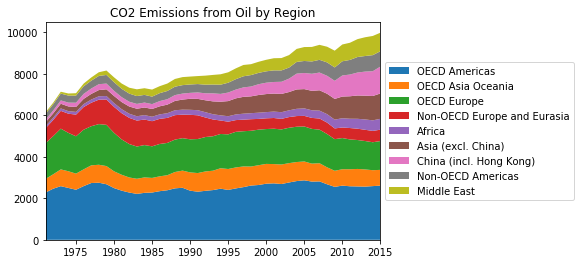

In [39]:
x = CO2_Regional_Fuel_Oil_df["Year"]
y1 = CO2_Regional_Fuel_Oil_df["OECD Americas"]
y2 = CO2_Regional_Fuel_Oil_df["OECD Asia Oceania"]
y3 = CO2_Regional_Fuel_Oil_df["OECD Europe"]
y4 = CO2_Regional_Fuel_Oil_df["Non-OECD Europe and Eurasia"]
y5 = CO2_Regional_Fuel_Oil_df["Africa"]
y6 = CO2_Regional_Fuel_Oil_df["Asia (excl. China)"]
y7 = CO2_Regional_Fuel_Oil_df["China (incl. Hong Kong, China)"]
y8 = CO2_Regional_Fuel_Oil_df["Non-OECD Americas"]
y9 = CO2_Regional_Fuel_Oil_df["Middle East"]
                
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])

labels = ["OECD Americas", "OECD Asia Oceania", "OECD Europe", "Non-OECD Europe and Eurasia", \
          "Africa", "Asia (excl. China)", "China (incl. Hong Kong)", "Non-OECD Americas", \
          "Middle East"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels)
plt.title("CO2 Emissions from Oil by Region")
plt.xlim(1971, 2015)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Output\CO2 Emissions from Oil by Region.png")
plt.show()

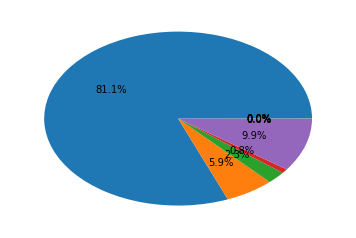

In [53]:
sizes = [sum(y1), sum(y2), sum(y3), sum(y4), sum(y5), sum(y6), sum(y7), sum(y8), sum(y9)]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()

# Regional breakdown of CO2 Emissions from Gas over time

In [25]:
#Regional CO2 emissions from Gas
CO2_Regional_Fuel_Gas_df = pd.DataFrame(CO2_Fuel_Gas)
CO2_Regional_Fuel_Gas_df = CO2_Regional_Fuel_Gas_df.set_index("million tonnes of CO2")
CO2_Regional_Fuel_Gas_df = CO2_Regional_Fuel_Gas_df.T
CO2_Regional_Fuel_Gas_df = CO2_Regional_Fuel_Gas_df.reset_index(level=0)
CO2_Regional_Fuel_Gas_df = CO2_Regional_Fuel_Gas_df.rename(columns={"index":"Year"})
CO2_Regional_Fuel_Gas_df[["Year", "World", "OECD Total", "Non-OECD Total"]] = CO2_Regional_Fuel_Gas_df[["Year", "World", "OECD Total", "Non-OECD Total"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Gas_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]] = CO2_Regional_Fuel_Gas_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Gas_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]] = CO2_Regional_Fuel_Gas_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Gas_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]] = CO2_Regional_Fuel_Gas_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]].apply(pd.to_numeric)
CO2_Regional_Fuel_Gas_df.head()

million tonnes of CO2  Year        World   OECD Total  Non-OECD Total  \
0                      1971  2043.623434  1484.882269      558.741165   
1                      1972  2152.286792  1564.223070      588.063722   
2                      1973  2233.009231  1611.061404      621.947827   
3                      1974  2285.142869  1625.590319      659.552550   
4                      1975  2249.441617  1554.476366      694.965251   

million tonnes of CO2   Canada     Chile   Mexico United States  \
0                      68.2221   1.32251  19.5601       1195.52   
1                      78.0465   1.20435  20.9687        1207.8   
2                      82.9991  0.945458  23.4537       1197.83   
3                      86.0481  0.985031  24.5892       1156.43   
4                      87.7752   1.11945  24.4559       1061.38   

million tonnes of CO2  OECD Americas Australia     ...     Jordan   Kuwait  \
0                        1284.629224   3.99863     ...          0  9.97085   
1                        1308.014826   5.81136     ...          0  10.8494   
2                        1305.232151   7.10818     ...          0    11.64   
3                        1268.056111   7.80711     ...          0  11.0251   
4                        1174.732886    8.6386     ...          0  9.92698   

million tonnes of CO2 Lebanon Oman    Qatar Saudi Arabia  \
0                           0    0  1.93725      2.70297   
1                           0    0  2.10988      3.06346   
2                           0    0  3.03056      3.60603   
3                           0    0  2.49349      4.56299   
4                           0    0  4.23894      5.43006   

million tonnes of CO2 Syrian Arab Republic  United Arab Emirates Yemen  \
0                                         0              2.05688     0   
1                                         0              2.04295     0   
2                                         0               2.4623     0   
3                                         0              2.35983     0   
4                                         0              3.26779     0   

million tonnes of CO2 Middle East  
0                       25.748206  
1                       28.398890  
2                       33.751066  
3                       34.618788  
4                       38.210027  

[5 rows x 161 columns]

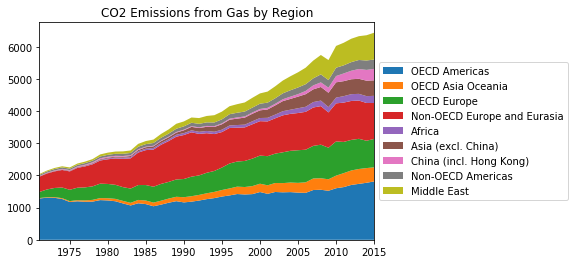

In [41]:
x = CO2_Regional_Fuel_Gas_df["Year"]
y1 = CO2_Regional_Fuel_Gas_df["OECD Americas"]
y2 = CO2_Regional_Fuel_Gas_df["OECD Asia Oceania"]
y3 = CO2_Regional_Fuel_Gas_df["OECD Europe"]
y4 = CO2_Regional_Fuel_Gas_df["Non-OECD Europe and Eurasia"]
y5 = CO2_Regional_Fuel_Gas_df["Africa"]
y6 = CO2_Regional_Fuel_Gas_df["Asia (excl. China)"]
y7 = CO2_Regional_Fuel_Gas_df["China (incl. Hong Kong, China)"]
y8 = CO2_Regional_Fuel_Gas_df["Non-OECD Americas"]
y9 = CO2_Regional_Fuel_Gas_df["Middle East"]
                
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])

labels = ["OECD Americas", "OECD Asia Oceania", "OECD Europe", "Non-OECD Europe and Eurasia", \
          "Africa", "Asia (excl. China)", "China (incl. Hong Kong)", "Non-OECD Americas", \
          "Middle East"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels)
plt.title("CO2 Emissions from Gas by Region")
plt.xlim(1971, 2015)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Output\CO2 Emissions from Gas by Region.png")
plt.show()

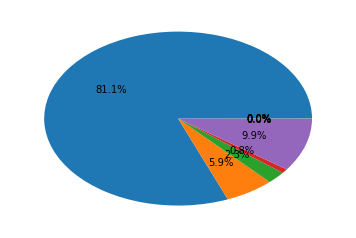

In [54]:
sizes = [sum(y1), sum(y2), sum(y3), sum(y4), sum(y5), sum(y6), sum(y7), sum(y8), sum(y9)]
plt.pie(sizes,autopct="%1.1f%%")
plt.show()

# Statistical analysis on CO2 Emissions

In [27]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
from spread import variance, standard_deviation, zipped_z_scores

2.0
1.4142135623730951
[(-2, -1.414213562373095), (-1, -0.7071067811865475), (0, 0.0), (1, 0.7071067811865475), (2, 1.414213562373095)]


In [28]:
data_to_load = "global-fossil-fuel-consumption.csv"
Fossil_fuel_data = pd.read_csv(data_to_load,error_bad_lines=False)

Fossil_fuel_data = Fossil_fuel_data.rename(columns={"Coal (terawatt-hours)":"Coal consumption (terawatt-hours)",
                                                   "Crude oil (terawatt-hours)": "Crude oil consumption (terawatt-hours)",
                                                   "Natural gas (terawatt-hours)": "Natural gas consumption (terawatt-hours)",
                                                   "Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)": \
                                                    "Total CO2 Fossil Fuel emissions (MtCO2)"})
Fossil_fuel_data.head()

Entity      Code  Year  Coal consumption (terawatt-hours)  \
0  World  OWID_WRL  1965                        16322.44092   
1  World  OWID_WRL  1966                        16512.65763   
2  World  OWID_WRL  1967                        16247.40207   
3  World  OWID_WRL  1968                        16493.29564   
4  World  OWID_WRL  1969                        17008.47160   

   Crude oil consumption (terawatt-hours)  \
0                             17740.36827   
1                             19104.36441   
2                             20468.91567   
3                             22225.38535   
4                             24130.44943   

   Natural gas consumption (terawatt-hours)  Population           GDP  \
0                               6823.934577  3339592688  1.870000e+13   
1                               7426.217421  3408121405  1.970000e+13   
2                               7961.256227  3479053821  2.040000e+13   
3                               8668.151001  3551880700  2.150000e+13   
4                               9510.132872  3625905514  2.270000e+13   

   Total CO2 Fossil Fuel emissions (MtCO2)  GDP growth (annual %)  \
0                                11266.800               5.571686   
1                                11827.392               5.794680   
2                                12193.792               4.432219   
3                                12798.352               6.209321   
4                                13556.800               6.148763   

   Population growth (annual %)  
0                      2.059444  
1                      2.112720  
2                      2.059204  
3                      2.039610  
4                      2.116434

# CO2 emissions vs. Population 

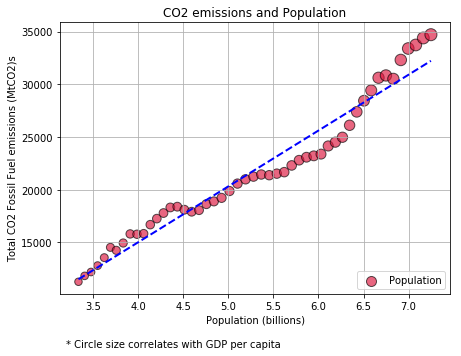

Slope value is: 5300.887507919899
Intercept value is: -6196.066283335484
R-value is: 0.9772121116258908
R-square value is: 0.9549435111083325
P-value is: 5.738999738750382e-34
Standard error value is: 166.19494154019628


The total CO2 emissions when we reach a global population of 8 billions will be 36211 (MtCO2)s.


In [29]:
#  Bubble chart – CO2 emissions vs. Population

GDP_per_capita = Fossil_fuel_data["GDP"]/Fossil_fuel_data["Population"]
x_Population = Fossil_fuel_data["Population"]/1000000000
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_Population, y_CO2_emissions, marker="o", facecolors="crimson", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="Population")

# Incorporate the other graph properties
plt.title("CO2 emissions and Population")
plt.xlabel("Population (billions)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

plt.text(3.2, 5100, "* Circle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
Pop_slope, Pop_intercept, Pop_r_value, Pop_p_value, Pop_std_err = linregress(x_Population, y_CO2_emissions)
Pop_fit = Pop_slope * x_Population + Pop_intercept
ax.plot(x_Population, Pop_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_Population_GDP.png")
plt.show()

print(f"Slope value is: {Pop_slope}")
print(f"Intercept value is: {Pop_intercept}")
print(f"R-value is: {Pop_r_value}")
print(f"R-square value is: {np.square(Pop_r_value)}")
print(f"P-value is: {Pop_p_value}")
print(f"Standard error value is: {Pop_std_err}")
x_Population = 8
print("\n")
print("The total CO2 emissions when we reach a global population of " + str(x_Population) + " billions will be " \
      + (Pop_slope * x_Population + Pop_intercept).astype(int).astype(str) + " (MtCO2)s.")

## Regression analysis
* 95.5% of the total variability in Y (CO2 emissions) is explained by its regression on X (Population).

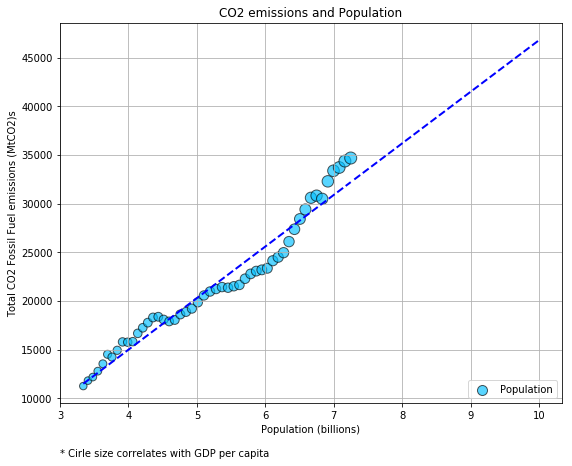

In [35]:
#  Bubble chart – CO2 emissions vs. Population

GDP_per_capita = Fossil_fuel_data["GDP"]/Fossil_fuel_data["Population"]
x_Population = Fossil_fuel_data["Population"]/1000000000
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_Population, y_CO2_emissions, marker="o", facecolors="deepskyblue", s=GDP_per_capita/100,
           edgecolors="black", alpha=0.65, label="Population")

# Incorporate the other graph properties
plt.title("CO2 emissions and Population")
plt.xlabel("Population (billions)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

plt.text(3, 4000, "* Cirle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(9,7)


# Set fit lines
Pop_slope, Pop_intercept, Pop_r_value, Pop_p_value, Pop_std_err = linregress(x_Population, y_CO2_emissions)
Pop_fit = Pop_slope * x_Population + Pop_intercept
ax.plot(x_Population, Pop_fit, 'b--', linewidth=2)

#Linear fit line
Linear_projection = [7.3,8,9,10]
Predicted_emissions =[]
counter = 0

for year in Linear_projection:
   x_Population = Linear_projection[counter]
   emissions = Pop_slope * x_Population + Pop_intercept
   Predicted_emissions.append(emissions)
   counter = counter + 1

ax.plot(Linear_projection, Predicted_emissions, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_Population_GDP.png")

plt.show()

# CO2 emissions vs. GDP growth

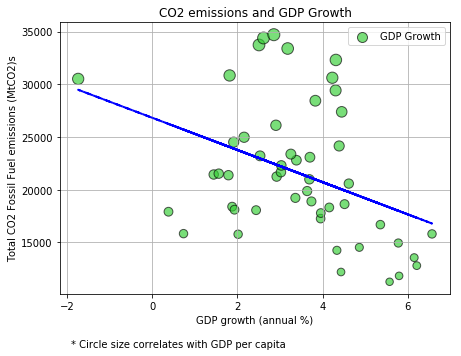

Slope value is: -1527.9912486981757
Intercept value is: 26827.6888648229
R-value is: -0.3852665104739916
R-square value is: 0.14843028409280626
P-value is: 0.005729374761982866
Standard error value is: 528.2616615903235


In [15]:
#  Bubble chart – CO2 emissions vs. GDP growth (%)

x_GDP_growth = Fossil_fuel_data["GDP growth (annual %)"]
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_GDP_growth, y_CO2_emissions, marker="o", facecolors="limegreen", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="GDP Growth")

# Incorporate the other graph properties
plt.title("CO2 emissions and GDP Growth")
plt.xlabel("GDP growth (annual %)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper right')

plt.text(-1.9, 5100, "* Circle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(GDPg_slope, GDPg_intercept, GDPg_r_value, GDPg_p_value, GDPg_std_err) = linregress(x_GDP_growth, y_CO2_emissions)
GDPg_fit = GDPg_slope * x_GDP_growth + GDPg_intercept
ax.plot(x_GDP_growth, GDPg_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_GDP_Growth.png")
plt.show()

#(GDPg_slope, GDPg_intercept, GDPg_r_value, GDPg_p_value, GDPg_std_err) = linregress(x_GDP_growth, y_CO2_emissions)
#GDPg_fit = GDPg_slope * x_GDP_growth + GDPg_intercept

print(f"Slope value is: {GDPg_slope}")
print(f"Intercept value is: {GDPg_intercept}")
print(f"R-value is: {GDPg_r_value}")
print(f"R-square value is: {np.square(GDPg_r_value)}")
print(f"P-value is: {GDPg_p_value}")
print(f"Standard error value is: {GDPg_std_err}")

## Regression analysis
* 14.8% of the total variability in Y (CO2 emissions) is explained by its regression on X (GDP Growth).

# CO2 emissions vs. GDP

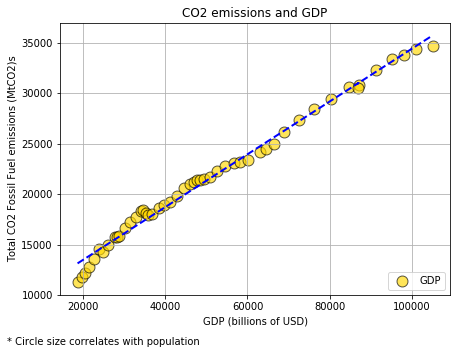

Slope value is: 0.2614120672605016
Intercept value is: 8267.19947773714
R-value is: 0.9948432267095468
R-square value is: 0.9897130457298629
P-value is: 2.2703676726314532e-49
Standard error value is: 0.0038467482954702855


In [16]:
#  Bubble chart – CO2 emissions vs. GDP growth (%)

x_GDP = Fossil_fuel_data["GDP"]/1000000000
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_GDP, y_CO2_emissions, marker="o", facecolors="gold", s=x_Population*15, 
            edgecolors="black", alpha=0.65, label="GDP")

# Incorporate the other graph properties
plt.title("CO2 emissions and GDP")
plt.xlabel("GDP (billions of USD)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

plt.text(1600, 5100, "* Circle size correlates with population")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(GDP_slope, GDP_intercept, GDP_r_value, GDP_p_value, GDP_std_err) = linregress(x_GDP, y_CO2_emissions)
GDP_fit = GDP_slope * x_GDP + GDP_intercept
ax.plot(x_GDP, GDP_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_GDP.png")
plt.show()

#(GDP_slope, GDP_intercept, GDP_r_value, GDP_p_value, GDP_std_err) = linregress(x_GDP, y_CO2_emissions)
#GDP_fit = GDP_slope * x_GDP + GDP_intercept

print(f"Slope value is: {GDP_slope}")
print(f"Intercept value is: {GDP_intercept}")
print(f"R-value is: {GDP_r_value}")
print(f"R-square value is: {np.square(GDP_r_value)}")
print(f"P-value is: {GDP_p_value}")
print(f"Standard error value is: {GDP_std_err}")

## Regression analysis
* 98.97% of the total variability in Y (CO2 emissions) is explained by its regression on X (GDP).

# CO2 emissions vs. Population Growth

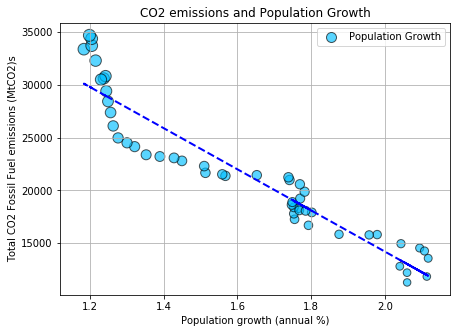

Slope value is: -19549.195453918273
Intercept value is: 53276.68697848055
R-value is: -0.9458772411309391
R-square value is: 0.8946837552894766
P-value is: 4.188850620681395e-25
Standard error value is: 968.10213198963


In [17]:
#  Bubble chart – CO2 emissions vs. Population growth (%)

x_Population_growth = Fossil_fuel_data["Population growth (annual %)"]
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_Population_growth, y_CO2_emissions, marker="o", facecolors="deepskyblue", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="Population Growth")

# Incorporate the other graph properties
plt.title("CO2 emissions and Population Growth")
plt.xlabel("Population growth (annual %)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper right')

#plt.text(-1.9, 5100, "* Cirle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(Populationg_slope, Populationg_intercept, Populationg_r_value, Populationg_p_value, Populationg_std_err) = linregress(x_Population_growth, y_CO2_emissions)
Populationg_fit = Populationg_slope * x_Population_growth + Populationg_intercept
ax.plot(x_Population_growth, Populationg_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_Population_Growth.png")
plt.show()

#(Populationg_slope, Populationg_intercept, Populationg_r_value, Populationg_p_value, Populationg_std_err) = linregress(x_Population_growth, y_CO2_emissions)
#Populationg_fit = Populationg_slope * x_Population_growth + Populationg_intercept

print(f"Slope value is: {Populationg_slope}")
print(f"Intercept value is: {Populationg_intercept}")
print(f"R-value is: {Populationg_r_value}")
print(f"R-square value is: {np.square(Populationg_r_value)}")
print(f"P-value is: {Populationg_p_value}")
print(f"Standard error value is: {Populationg_std_err}")

## Regression analysis
* 89.5% of the total variability in Y (CO2 emissions) is explained by its regression on X (Population Growth).

# Total CO2 Emissions per capita

In [7]:
#CO2 Per capita
CO2_Per_capita_df = pd.DataFrame(CO2_Per_capita)
CO2_Per_capita_df = CO2_Per_capita_df.set_index("tonnes CO2 / capita")
CO2_Per_capita_df = CO2_Per_capita_df.T
CO2_Per_capita_df = CO2_Per_capita_df.reset_index(level=0)
CO2_Per_capita_df = CO2_Per_capita_df.rename(columns={"index":"Year"})
CO2_Per_capita_df[["Year", "World", "OECD Total", "Non-OECD Total"]] = CO2_Per_capita_df[["Year", "World", "OECD Total", "Non-OECD Total"]].apply(pd.to_numeric)
CO2_Per_capita_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]] = CO2_Per_capita_df[["OECD Americas", "OECD Asia Oceania", "OECD Europe"]].apply(pd.to_numeric)
CO2_Per_capita_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]] = CO2_Per_capita_df[["China (incl. Hong Kong, China)", "Non-OECD Americas", "Middle East"]].apply(pd.to_numeric)
CO2_Per_capita_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]] = CO2_Per_capita_df[["Non-OECD Europe and Eurasia", "Africa", "Asia (excl. China)"]].apply(pd.to_numeric)
CO2_Per_capita_df.head()

tonnes CO2 / capita  Year   World  OECD Total  Non-OECD Total   Canada  \
0                    1971  3.7092     10.3981          1.4254   15.488   
1                    1972  3.8109     10.7387          1.4718  16.1053   
2                    1973  3.9504     11.1859          1.5336  16.6979   
3                    1974  3.8670     10.8415          1.5694  16.8913   
4                    1975  3.8114     10.3892          1.6690  16.2911   

tonnes CO2 / capita   Chile  Mexico United States  OECD Americas Australia  \
0                      2.16  1.7536       20.6464        16.1966    10.862   
1                    2.0834  1.9265       21.5649        16.8587   11.0683   
2                    1.9853  2.0601       22.1292        17.2526   11.5853   
3                    1.9235  2.1759       21.2204        16.5818   12.4736   
4                    1.6429  2.2127       20.1637        15.7368   12.8465   

tonnes CO2 / capita     ...      Jordan   Kuwait Lebanon    Oman    Qatar  \
0                       ...      0.7764  17.3688  1.9457  0.3422  18.8226   
1                       ...      0.8287  17.8246  2.0616  0.3385  18.9934   
2                       ...      0.9185  17.5315  2.5748  0.3603  24.3347   
3                       ...      0.9475  15.8995  2.5576  0.5331  19.4662   
4                       ...      1.0833  14.3712  2.2157  0.8186  30.0383   

tonnes CO2 / capita Saudi Arabia Syrian Arab Republic  United Arab Emirates  \
0                         2.0792                0.8232               8.9545   
1                         2.2572                0.7528               7.9776   
2                         2.6222                0.6976               8.4403   
3                         2.8671                0.9549               7.4562   
4                         3.0303                1.0917               9.2614   

tonnes CO2 / capita   Yemen Middle East  
0                     0.192      1.4875  
1                    0.2282      1.5873  
2                    0.2869      1.7942  
3                    0.2782      1.9151  
4                    0.2579      2.1018  

[5 rows x 161 columns]

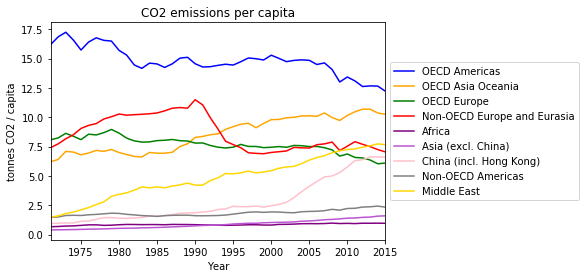

In [30]:
#CO2 emissions per capita
x_axis_per_capita = CO2_Per_capita_df["Year"].tolist()

y_axis_per_capita_1 = CO2_Per_capita_df["OECD Americas"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_1, color='b', label="OECD Americas")

y_axis_per_capita_2 = CO2_Per_capita_df["OECD Asia Oceania"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_2, color='orange', label="OECD Asia Oceania")

y_axis_per_capita_3 = CO2_Per_capita_df["OECD Europe"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_3, color='green', label="OECD Europe")

y_axis_per_capita_4 = CO2_Per_capita_df["Non-OECD Europe and Eurasia"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_4, color='red', label="Non-OECD Europe and Eurasia")

y_axis_per_capita_5 = CO2_Per_capita_df["Africa"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_5, color='purple', label="Africa")

y_axis_per_capita_6 = CO2_Per_capita_df["Asia (excl. China)"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_6, color='mediumorchid', label="Asia (excl. China)")

y_axis_per_capita_7 = CO2_Per_capita_df["China (incl. Hong Kong, China)"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_7, color='pink', label="China (incl. Hong Kong)")

y_axis_per_capita_8 = CO2_Per_capita_df["Non-OECD Americas"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_8, color='gray', label="Non-OECD Americas")

y_axis_per_capita_9 = CO2_Per_capita_df["Middle East"].tolist()
plt.plot(x_axis_per_capita, y_axis_per_capita_9, color='gold', label="Middle East")

plt.title("CO2 emissions per capita")
plt.xlabel("Year")
plt.ylabel("tonnes CO2 / capita")
plt.xlim(1971, 2015)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Output/CO2 emissions per capita.png")
plt.show()

In [55]:
Comparison_OECD_Americas_vs_China = CO2_Per_capita_df["OECD Americas"]/CO2_Per_capita_df["China (incl. Hong Kong, China)"]
#Comparison_OECD_Americas_vs_China.tail
#print(CO2_Per_capita_df["China (incl. Hong Kong, China)"][0])

#print(Comparison_OECD_Americas_vs_China[44])
print(f"In {CO2_Per_capita_df['Year'][0]}, a person in the OECD Americas produced {round(Comparison_OECD_Americas_vs_China[0],1)} times more tonnes of CO2 than a person in China.")
print(f"In {CO2_Per_capita_df['Year'][44]}, a person in the OECD Americas produced {round(Comparison_OECD_Americas_vs_China[44],1)} times more tonnes of CO2 than a person in China.")

In 1971, a person in the OECD Americas produced 17.3 times more tonnes of CO2 than a person in China.
In 2015, a person in the OECD Americas produced 1.9 times more tonnes of CO2 than a person in China.


# GDP vs Population

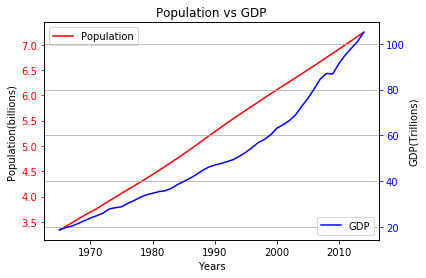

In [31]:
# GDP vs Population line graph

#Retrieving data from dataset to plot.
x = Fossil_fuel_data["Year"]
y1 = Fossil_fuel_data["Population"]/1000000000
y1 = [int(x.replace(",","")) if isinstance(x, str) else x for x in y1]
y2 = Fossil_fuel_data["GDP"]/1000000000000
y2 = [int(x.replace(",","")) if isinstance(x, str) else x for x in y2]

fig, ax1 = plt.subplots()

# Creating Populaton y-axis, legend, and labels
ax1.plot(x, y1, label='Population',color='red')
ax1.tick_params('y', colors='r')
ax1.legend(loc='upper left')
plt.xlabel("Years")
plt.ylabel("Population(billions)")

# Creating GDP y-axis, legend, and labels
ax2 = ax1.twinx()
ax2.plot(x, y2, label='GDP',color='blue')
ax2.tick_params('y', colors='b')
ax2.legend(loc='lower right')
plt.title("Population vs GDP")
plt.ylabel("GDP(Trillions)")

# Save an image of the chart and print to screen
plt.savefig("Output/CO2 and Consumption Comparison.png")
plt.grid()
plt.show()


In [32]:
data_file = "global-fossil-fuel-consumption - Copy.xlsx"

#Total
CO2_file = pd.read_excel(data_file,header=0,sheet_name="global-fossil-fuel-consumption")
CO2_Fuel = CO2_file["Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)"]
#CO2 consumption from Coal
CO2_Cons_Coal = CO2_file["Coal (terawatt-hours)"]
#CO2 consumption from Oil
CO2_Cons_Oil = CO2_file["Crude oil (terawatt-hours)"]
#CO2 consumption from Gas
CO2_Cons_Gas = CO2_file["Natural gas (terawatt-hours)"]
#Total CO2 emissions from Fossil Fuels
CO2_Emis_Total = CO2_file["Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)"]

CO2_file.head()

Entity      Code  Year  Coal (terawatt-hours)  Crude oil (terawatt-hours)  \
0  World  OWID_WRL  1850              569.44490                     0.00000   
1  World  OWID_WRL  1860             1061.11196                     0.00000   
2  World  OWID_WRL  1870             1641.66798                     5.55556   
3  World  OWID_WRL  1880             2541.66870                    33.33336   
4  World  OWID_WRL  1890             3855.55864                    88.88896   

   Natural gas (terawatt-hours)    Population           GDP  \
0                       0.00000  1.270591e+09           NaN   
1                       0.00000  1.327610e+09           NaN   
2                       0.00000  1.326907e+09  1.923917e+12   
3                       0.00000  1.405146e+09           NaN   
4                      33.33336  1.522735e+09           NaN   

   Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)  
0                                            197.856                   
1                                            333.424                   
2                                            538.608                   
3                                            864.704                   
4                                           1304.384

# CO2 Emissions vs CO2 Consumption

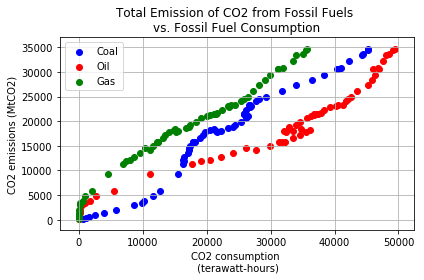

In [34]:
#Coal consumption vs CO2 emission
y_axis = CO2_Emis_Total
x_axis_Coal = CO2_Cons_Coal
plt.scatter(x_axis_Coal,y_axis,color='b',label="Coal")

#Oil consumption vs CO2 emission
x_axis_Oil = CO2_Cons_Oil
plt.scatter(x_axis_Oil,y_axis,color='r',label="Oil")

#Gas consumption vs CO2 emission
x_axis_Gas = CO2_Cons_Gas
plt.scatter(x_axis_Gas,y_axis,color='g',label="Gas")

plt.title("Total Emission of CO2 from Fossil Fuels \nvs. Fossil Fuel Consumption")
plt.xlabel("CO2 consumption \n (terawatt-hours)")
plt.ylabel("CO2 emissions (MtCO2)")
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig("Output\Emissions vs Consumption.png")
plt.show()